<a href="https://colab.research.google.com/github/soumyagitnew/Task-5/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       Social Media          TV       Radio  Billboards  Interaction_SM_TV  \
count    300.000000  300.000000  300.000000  300.000000         300.000000   
mean     204.377250  257.882557   80.711315   89.173478         564.302294   
std      110.139423  137.303701   42.086494   59.384574         484.145512   
min       11.048345   20.039306    5.303326    0.024020           8.947250   
25%      118.284491  148.896698   43.411111   34.064950         182.899886   
50%      205.836050  250.080102   81.221959   84.650578         395.980119   
75%      292.233679  372.937293  115.875585  139.752370         874.869424   
max      398.473668  499.480835  149.399856  199.691825        1873.556957   

       Interaction_RB_BB       Sales  
count         300.000000  300.000000  
mean          150.734691   39.447818  
std           130.616645   11.029790  
min             0.099363   10.923709  
25%            41.865080   31.914989  
50%           113.164641   39.834561  
75%           220.368621

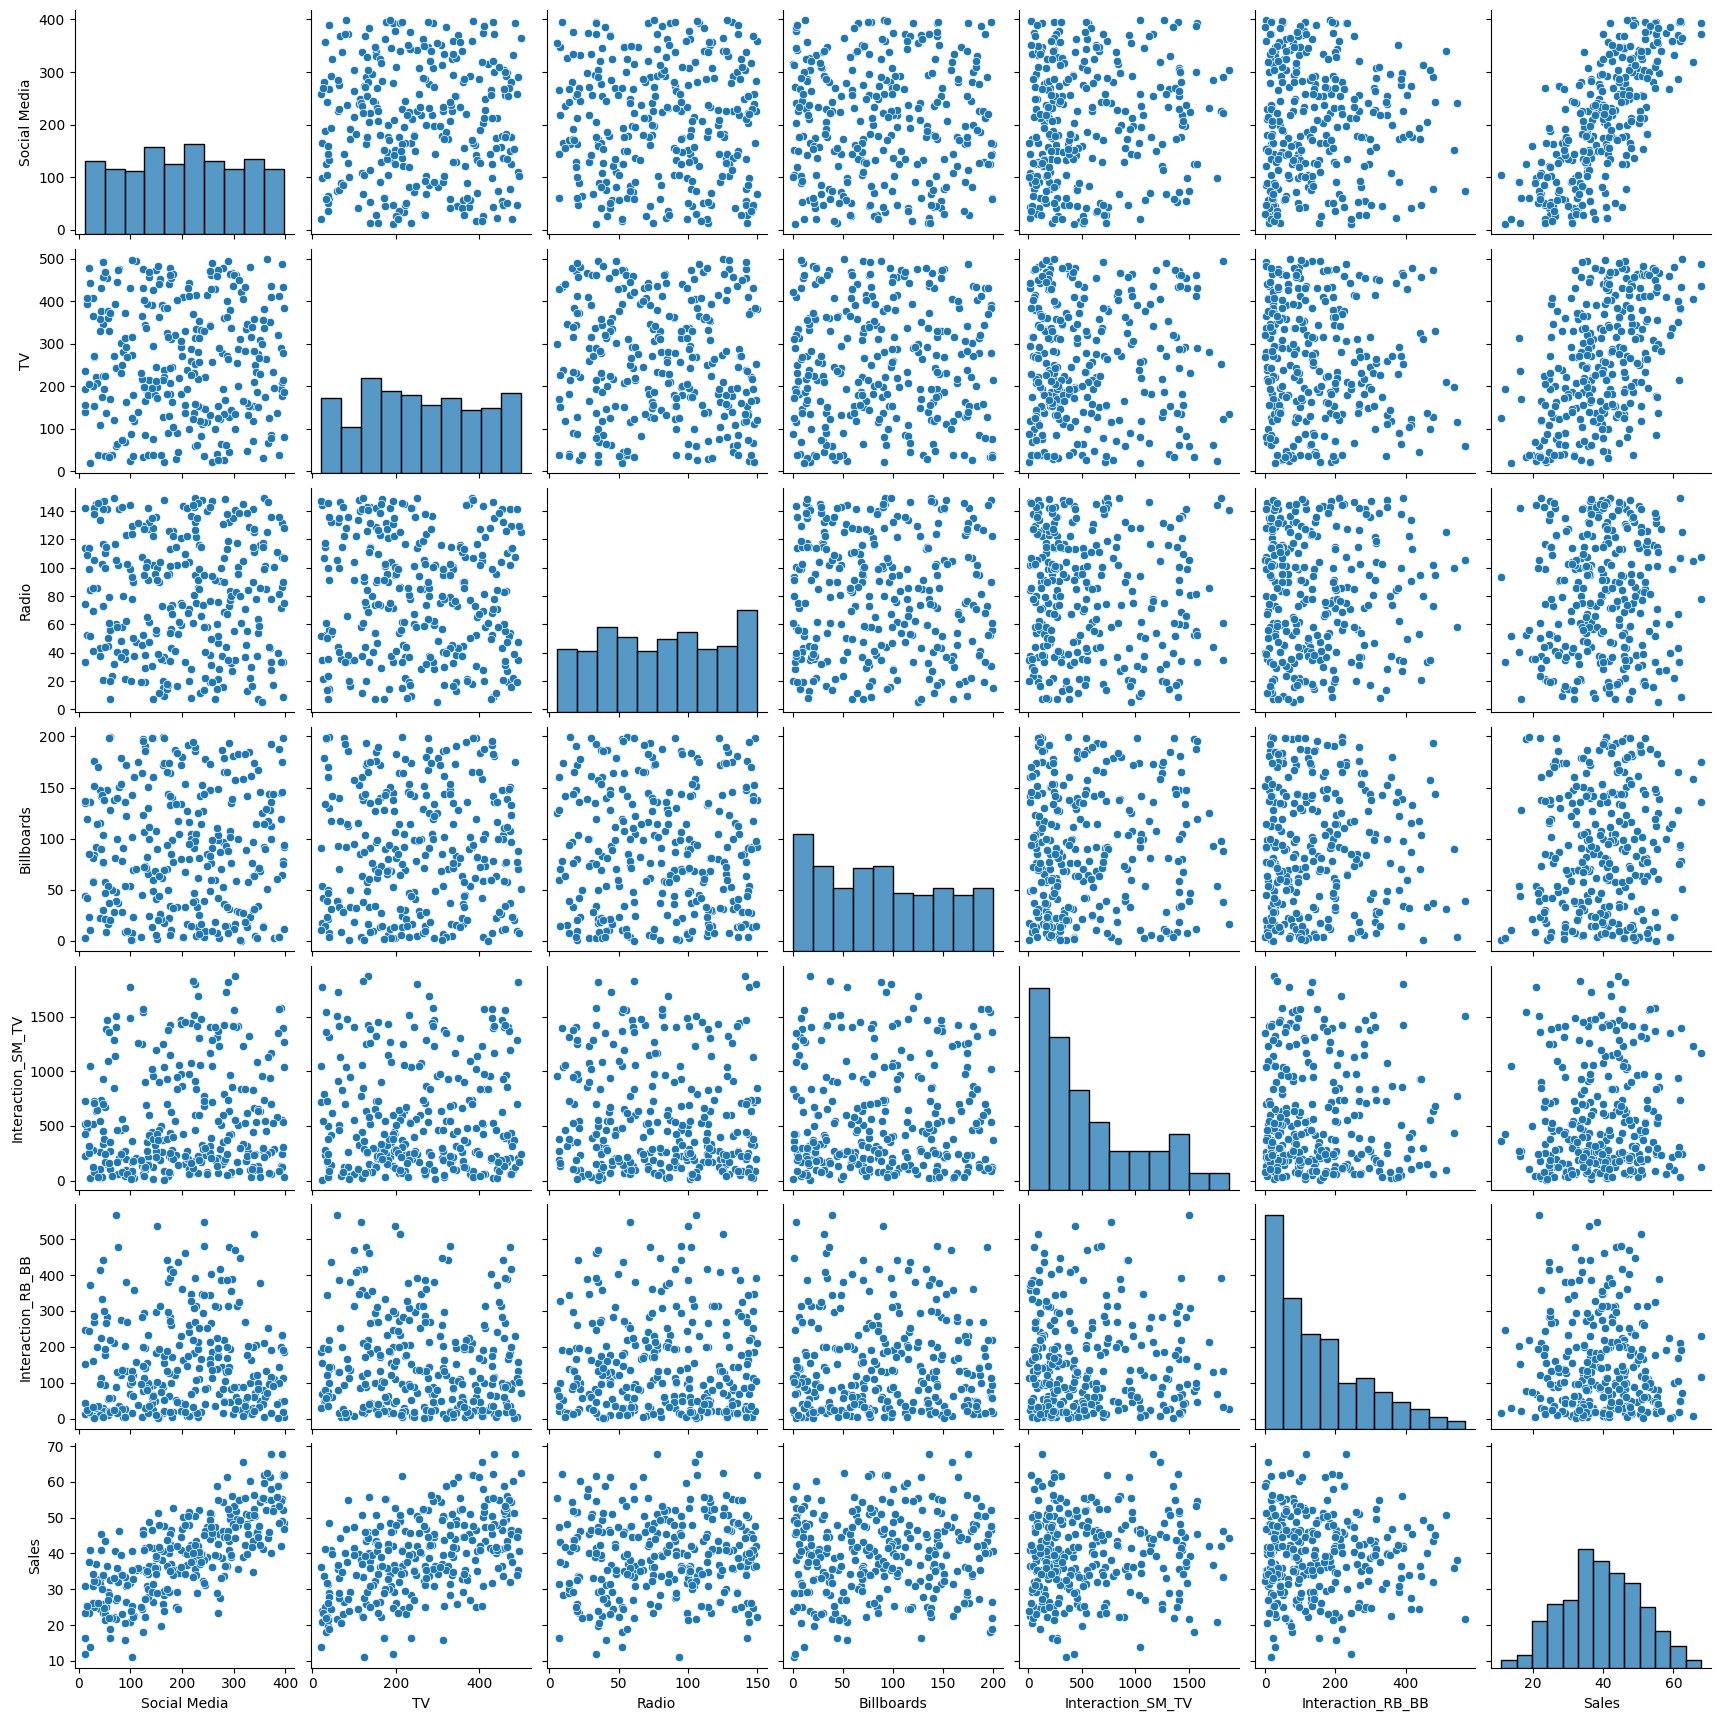

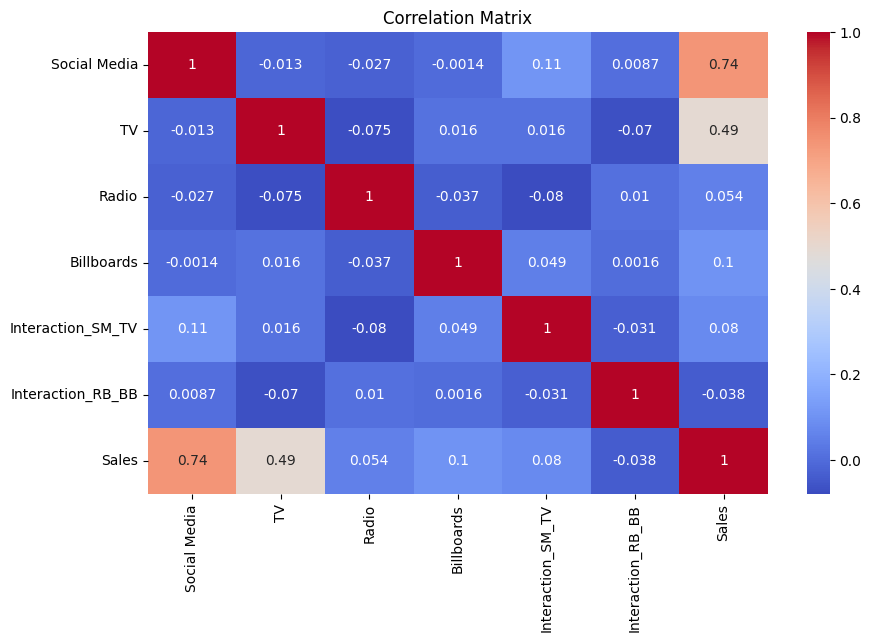

Linear Regression: MSE=23.59, MAE=4.04, R2=0.80
Ridge Regression: MSE=23.59, MAE=4.04, R2=0.80
Random Forest: MSE=29.26, MAE=4.58, R2=0.75
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest (Tuned): MSE=28.41, MAE=4.52, R2=0.76


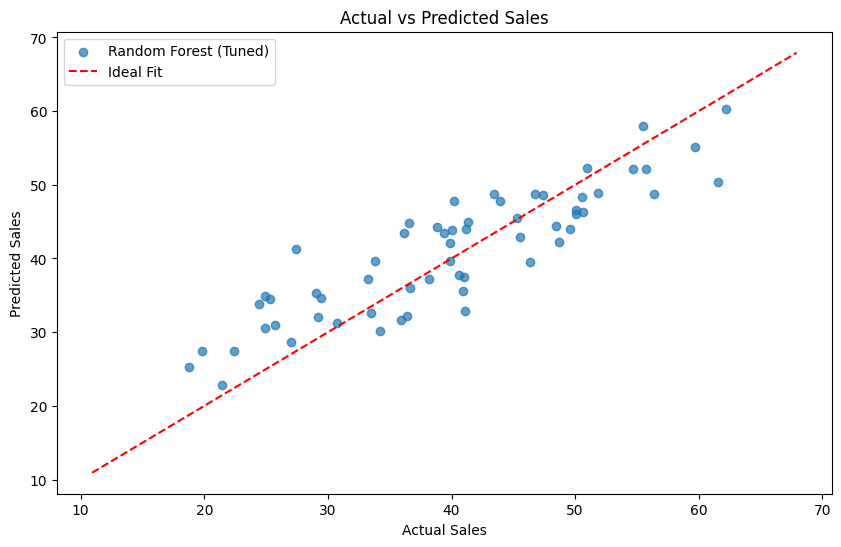

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Generate Synthetic Dataset
np.random.seed(123)
n_samples = 300
data = {
    'Social Media': np.random.uniform(10, 400, n_samples),
    'TV': np.random.uniform(20, 500, n_samples),
    'Radio': np.random.uniform(5, 150, n_samples),
    'Billboards': np.random.uniform(0, 200, n_samples),
    'Interaction_SM_TV': 0.01 * np.random.uniform(10, 400, n_samples) * np.random.uniform(20, 500, n_samples),
    'Interaction_RB_BB': 0.02 * np.random.uniform(5, 150, n_samples) * np.random.uniform(0, 200, n_samples),
}
data['Sales'] = (
    10 +
    0.07 * data['Social Media'] +
    0.04 * data['TV'] +
    0.03 * data['Radio'] +
    0.02 * data['Billboards'] +
    0.0001 * data['Interaction_SM_TV'] +
    0.0002 * data['Interaction_RB_BB'] +
    np.random.normal(scale=5, size=n_samples)
)
df = pd.DataFrame(data)

# Step 2: Exploratory Data Analysis
print(df.describe())
sns.pairplot(df)
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 3: Prepare Data for Modeling
X = df[['Social Media', 'TV', 'Radio', 'Billboards', 'Interaction_SM_TV', 'Interaction_RB_BB']]
y = df['Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Multiple Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f"{model_name}: MSE={mse:.2f}, MAE={mae:.2f}, R2={r2:.2f}")

# Step 5: Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_

# Step 6: Evaluate Best Random Forest Model
y_pred_rf = best_rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest (Tuned): MSE={rf_mse:.2f}, MAE={rf_mae:.2f}, R2={rf_r2:.2f}")

# Step 7: Visualization of Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Random Forest (Tuned)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# New Section

           TV       Radio  Newspaper      Sales
0  115.489335  130.196171  10.312387  13.295827
1  285.460720   21.407293  90.255291  19.341742
2  220.938213   36.517599  50.525237  17.831852
3  181.604253  180.218067  82.645747  18.033943
4   51.025499  123.253667  32.004960  10.228036


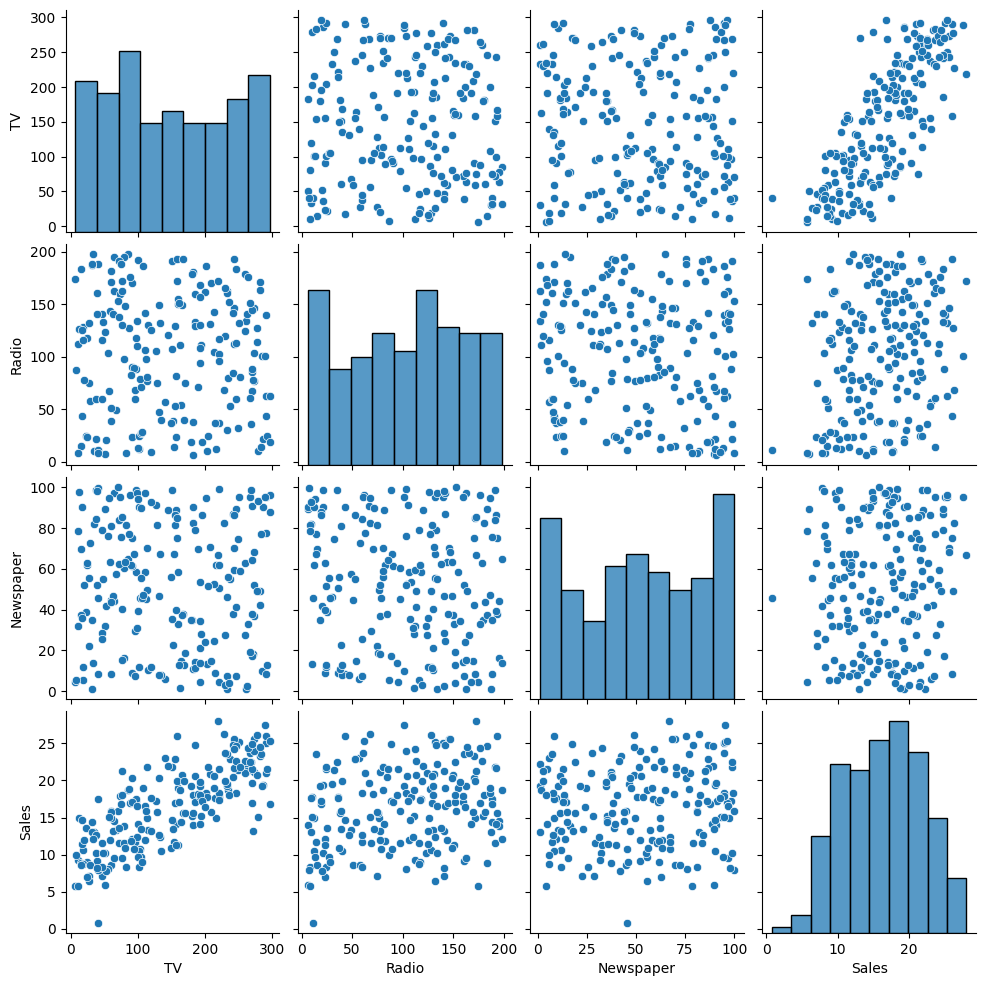

MAE: 2.11
MSE: 6.21
R²: 0.79


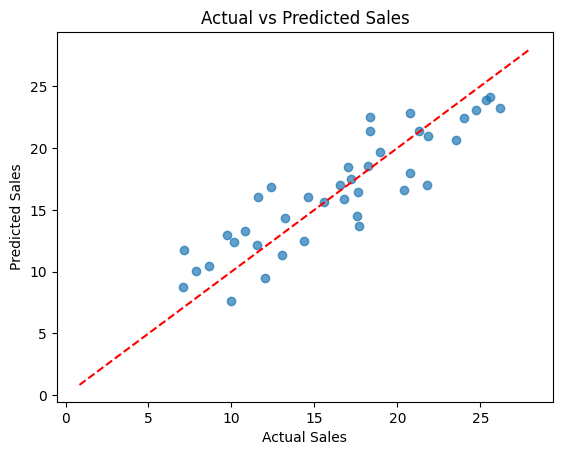

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Synthetic Data
np.random.seed(42)
n_samples = 200
data = {
    'TV': np.random.uniform(5, 300, n_samples),
    'Radio': np.random.uniform(5, 200, n_samples),
    'Newspaper': np.random.uniform(0, 100, n_samples),
}
data['Sales'] = (
    5 +
    0.05 * data['TV'] +
    0.03 * data['Radio'] +
    0.02 * data['Newspaper'] +
    np.random.normal(scale=3, size=n_samples)
)
df = pd.DataFrame(data)

# Step 2: Explore Data
print(df.head())
sns.pairplot(df)
plt.show()

# Step 3: Split Data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict Sales
y_pred = model.predict(X_test)

# Step 6: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Step 7: Visualize Predictions
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Generate Synthetic Data
np.random.seed(42)
n_samples = 200
data = {
    'TV': np.random.uniform(5, 300, n_samples),
    'Radio': np.random.uniform(5, 200, n_samples),
    'Newspaper': np.random.uniform(0, 100, n_samples),
}
data['Sales'] = (
    5 +
    0.05 * data['TV'] +
    0.03 * data['Radio'] +
    0.02 * data['Newspaper'] +
    np.random.normal(scale=3, size=n_samples)
)
df = pd.DataFrame(data)

# Step 2: Split Data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict Sales
y_pred = model.predict(X_test)

# Step 5: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Evaluation Metrics:")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  R²: {r2:.2f}")
print("\n")

# Step 6: Display Predictions in Text
comparison = pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})
comparison['Difference'] = comparison['Actual Sales'] - comparison['Predicted Sales']

# Show Predictions in Text
print("Predictions vs Actual Sales:")
print(comparison.head(10))  # Display the first 10 rows of comparison

Evaluation Metrics:
  MAE: 2.11
  MSE: 6.21
  R²: 0.79


Predictions vs Actual Sales:
   Actual Sales  Predicted Sales  Difference
0     14.633357        16.065645   -1.432288
1      8.662560        10.420408   -1.757848
2     17.027864        18.466970   -1.439106
3     16.755681        15.857663    0.898018
4      9.968301         7.619973    2.348328
5     21.323686        21.360517   -0.036831
6     25.312336        23.842017    1.470319
7     21.791165        16.986132    4.805032
8     17.224654        17.461478   -0.236823
9     18.348965        22.484000   -4.135035
